# data_analyze

### Package setting

In [1]:
import numpy as np
import pandas as pd 
from PIL import Image
import shutil
import glob
import os
import random
from tqdm.auto import tqdm
import cv2
import matplotlib.pyplot as plt
import json

c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\myenv38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def rebuild_dir(target_path):
    if os.path.exists(target_path):
        shutil.rmtree(target_path)
        os.makedirs(target_path)
    else:
        os.makedirs(target_path)

### Set Paths

In [3]:
current_path = os.getcwd()  # root

dataset_name = 'Full_Image'
dataset_path=os.path.join(current_path, dataset_name)

image_path = os.path.abspath(current_path + "/../../../../../../test")
image_file = ([x for x in os.listdir(image_path)])

print(current_path)
print(dataset_path)
print(image_path)
print(image_file)

c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train
c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\Full_Image
c:\Users\yy\Desktop\test
['1.tif', '10.tif', '11.tif', '12.tif', '13.tif']


In [4]:
sample_path = os.path.join(current_path,"result2")

sample_crop = os.path.join(sample_path,'preprocessing','Crop')  # 자른 이미지
sample_label = os.path.join(sample_path,'preprocessing','Label')  # 자른 라벨

sample_prediction = os.path.join(sample_path,'prediction')  # 결과 이미지들

### pandas dataframe

In [5]:
pd.set_option('display.max_colwidth', 5500)

base_name = ['.'.join(x.split('.')[:1]) for x in image_file]
df = pd.DataFrame({
    'base_names': base_name,
    'file_name': image_file,
    'file_dir': [os.path.join(image_path, x) for x in image_file],
    'autolabeling_dir': [os.path.join(sample_label, f'{x}_crop') for x in base_name],  # 라벨링 결과
    'img_dir': [os.path.join(sample_prediction, f'{x}_result') for x in base_name]})  # 라벨링 비교 이미지 결과
df

base_names file_name                         file_dir  \
0          1     1.tif   c:\Users\yy\Desktop\test\1.tif   
1         10    10.tif  c:\Users\yy\Desktop\test\10.tif   
2         11    11.tif  c:\Users\yy\Desktop\test\11.tif   
3         12    12.tif  c:\Users\yy\Desktop\test\12.tif   
4         13    13.tif  c:\Users\yy\Desktop\test\13.tif   

                                                                                                                                                      autolabeling_dir  \
0   c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\preprocessing\Label\1_crop   
1  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\preprocessing\Label\10_crop   
2  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\preprocessing\Label\11_crop   
3  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\preprocessing\Label\12_crop   
4  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\preprocessing\Label\13_crop   

                                                                                                                                                        img_dir  
0   c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\1_result  
1  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\10_result  
2  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\11_result  
3  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\12_result  
4  c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\13_result

### mask

In [7]:
def blurrd_img(tiff_files):
    ## 원본 이미지
    img = cv2.imread(tiff_files, cv2.IMREAD_COLOR_RGB)

    ## 블러 처리
    blur = cv2.medianBlur(img, 9)

    hsv_img = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

    ## hsv 채널분리
    h, s, v = cv2.split(hsv_img)

    _, thr_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    __cached__, thr_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    thr_v -= 255

    # Contours 찾기
    contours_s, _ = cv2.findContours(thr_s, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_v, _ = cv2.findContours(thr_v, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    contour_img_s = thr_s.copy()
    cn_filled_s = cv2.drawContours(contour_img_s, contours_s, -1, (255,255,255), -1)

    contour_img_v = thr_v.copy()
    cn_filled_v = cv2.drawContours(contour_img_v, contours_v, -1, (255,255,255), -1)

    ## hsv 채널 중 s,v 채널 영역 합침
    mask_area = cv2.bitwise_and(cn_filled_s, cn_filled_v)

    # Contours 찾기
    contours, _ = cv2.findContours(mask_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contours를 그릴 이미지 생성
    contour_img = mask_area.copy()

    # Contours 그리기
    cn_filled = cv2.drawContours(contour_img, contours, -1, (255,255,255), -1)

    result_img = img.copy()
    result_img[np.logical_not(cn_filled)] = [255, 255, 255]  # 흰색으로 채우기

    return result_img

1.tif


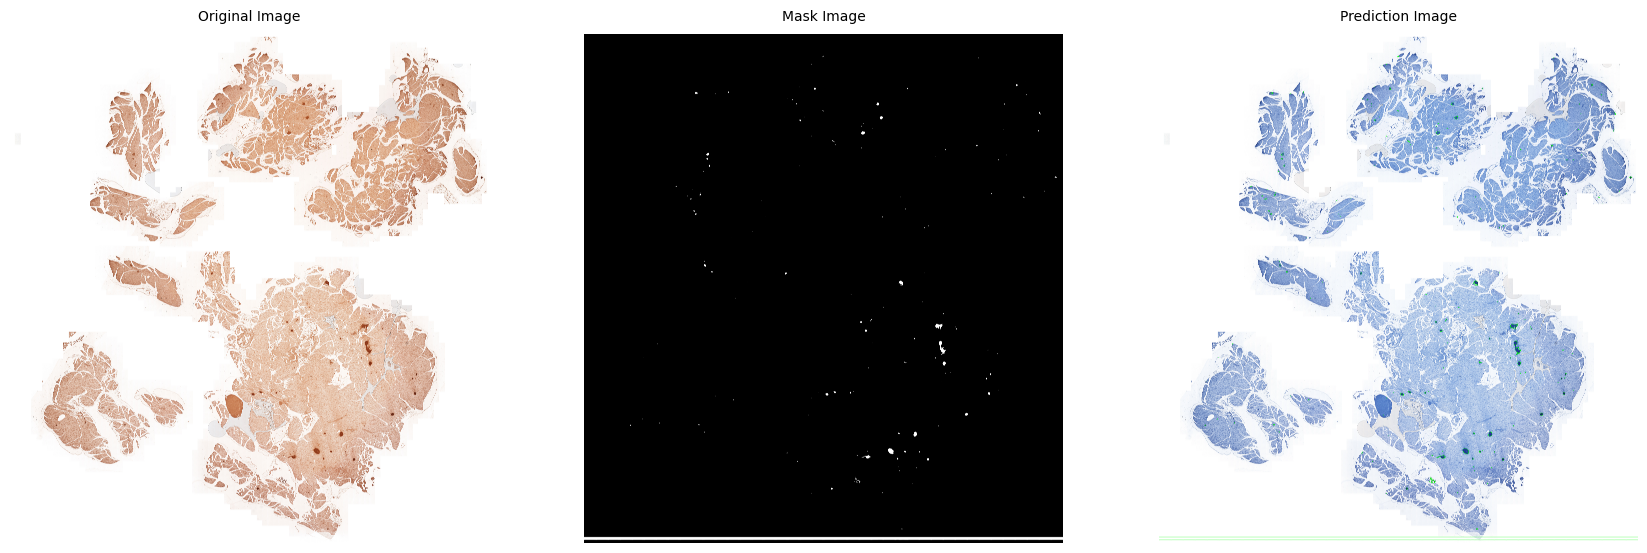

10.tif


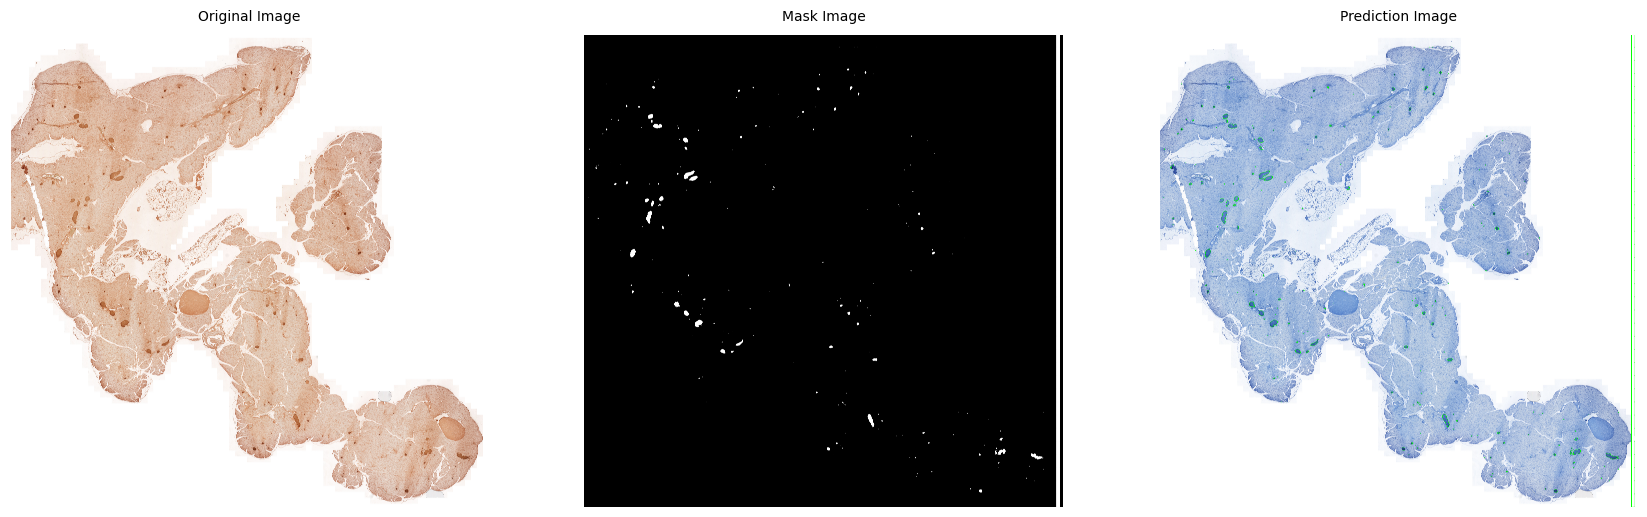

11.tif


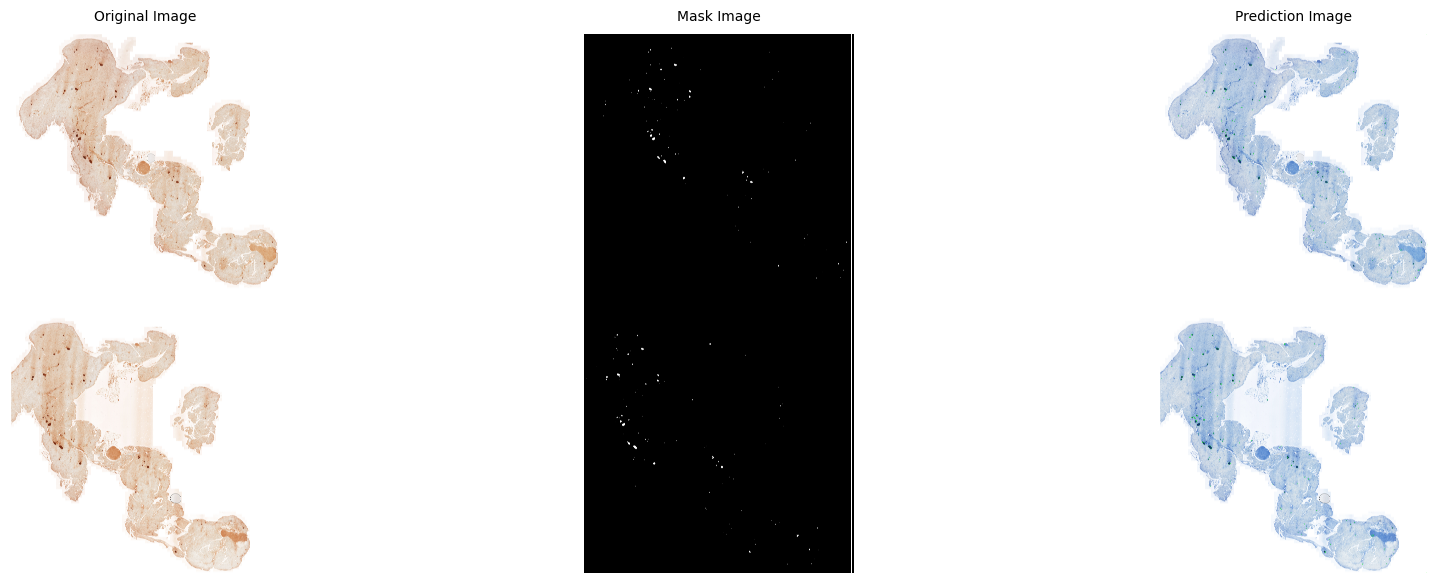

12.tif


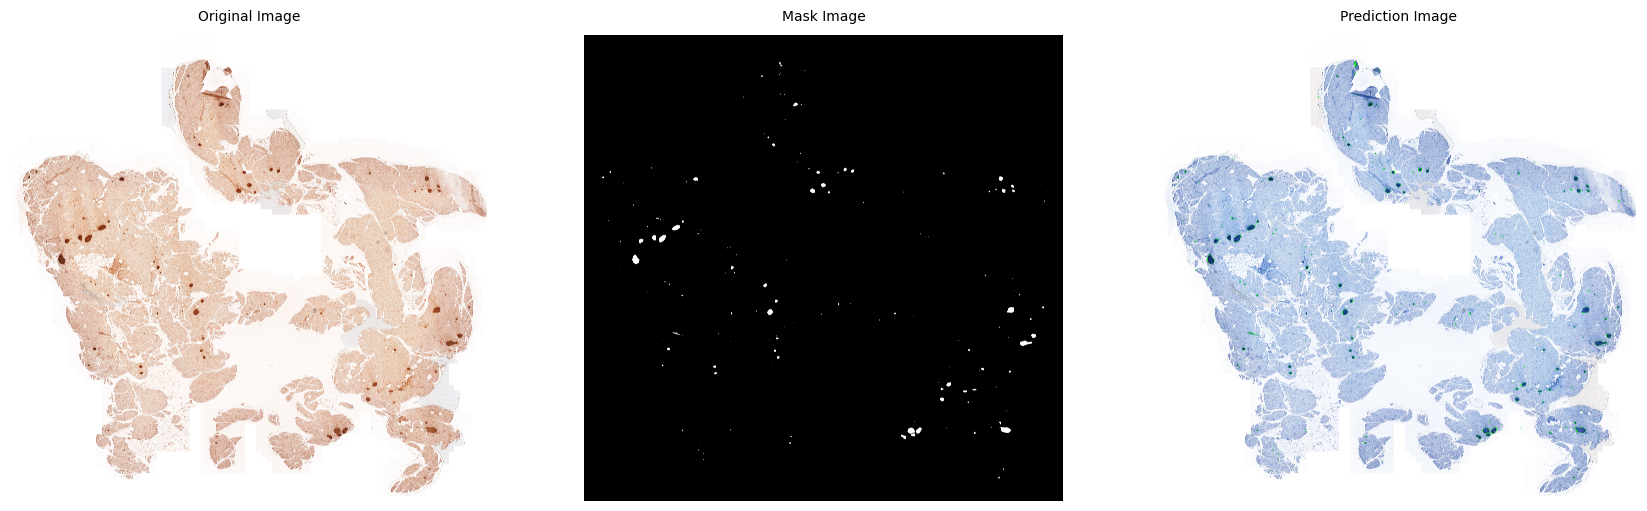

13.tif


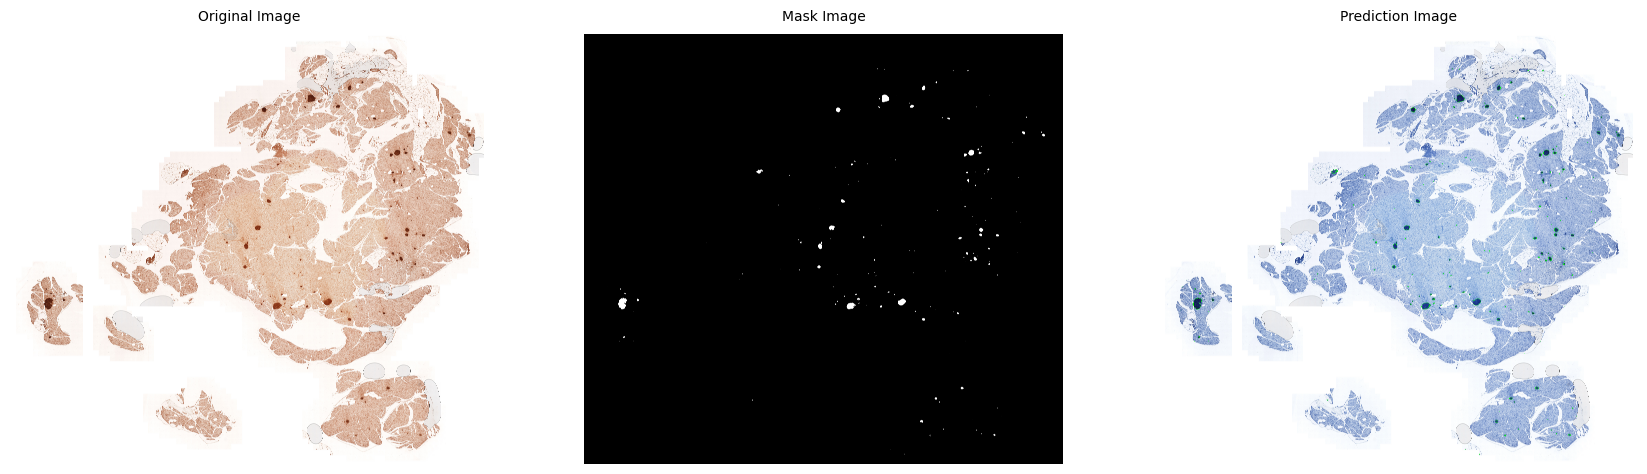

In [8]:
for i in df.index:
    print(df.loc[i, "file_name"])
    image = cv2.imread(df.loc[i,'file_dir'], cv2.IMREAD_COLOR)  # 원본이미지
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 읽으므로 RGB로 변환

    prediction_path = df.loc[i, "img_dir"]
    prediction_file = os.path.join(prediction_path, f"{df.loc[i, 'base_names']}_contour.png")

    prediction_image = cv2.imread(prediction_file, cv2.IMREAD_COLOR)
    prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)

    mask_file = f"{df.loc[i, 'base_names']}_segmentation.png"
    mask_image = cv2.imread(os.path.join(prediction_path, mask_file))[:,:,0]

    fig, axes = plt.subplots(1, 3, figsize=(21, 7), facecolor='white')
    axes[0].set_title('Original Image', fontsize = 10, pad = 10)
    axes[0].axis('off')
    axes[0].imshow(image)
    axes[1].set_title('Mask Image', fontsize = 10, pad = 10)
    axes[1].axis('off')
    axes[1].imshow(mask_image, cmap='gray')
    axes[2].set_title('Prediction Image', fontsize = 10, pad = 10)
    axes[2].axis('off')
    axes[2].imshow(prediction_image)
    plt.show()
    

### histogram

In [6]:
def analyze_segmentation_mask(mask_path, bin_size=1000):
    """
    저장된 전체 마스크 이미지를 분석하여 Contour 개수와 크기 분포를 반환합니다.

    :param mask_path: 분석할 마스크 이미지 파일 경로 (예: '..._mask.png')
    :param bin_size: 히스토그램의 구간 크기 (기본값: 1000 픽셀)
    :return: (전체 Contour 개수, 히스토그램 카운트, 히스토그램 구간) 튜플
    """
    
    # 1. 마스크 이미지를 그레이스케일로 로드
    mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask_image is None:
        print(f"오류: 이미지를 로드할 수 없습니다. 경로: {mask_path}")
        return 0, None, None

    # 2. Contour 찾기
    # cv2.RETR_EXTERNAL: 가장 바깥쪽의 Contour만 찾습니다.
    # cv2.CHAIN_APPROX_SIMPLE: Contour의 꼭짓점만 저장하여 메모리를 절약합니다.
    contours, _ = cv2.findContours(
        mask_image, 
        cv2.RETR_EXTERNAL, 
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    total_contours = len(contours)
    print(f"--- 마스크 분석 결과 ('{os.path.basename(mask_path)}') ---")
    print(f"✅ 전체 Contour 개수: {total_contours} 개")
    
    if total_contours == 0:
        print("분석할 Contour가 없습니다.")
        return 0, None, None

    # 3. 각 Contour의 픽셀 면적(Area) 계산
    contour_areas = [cv2.contourArea(cnt) for cnt in contours]
    
    # 4. 1000 단위로 찢어서 히스토그램화
    max_area = max(contour_areas)
    
    # 히스토그램 구간(bins) 설정
    # 예: max_area가 3500이면, bins = [0, 1000, 2000, 3000, 4000]
    bins = np.arange(0, max_area + bin_size, bin_size)
    
    # NumPy를 사용하여 히스토그램 계산
    hist_counts, bin_edges = np.histogram(contour_areas, bins=bins)
    
    # # 5. 결과 출력
    # print("\n--- Contour 크기 분포 (히스토그램) ---")
    # for i in range((total_contours)):
    #     print(f"{i}번째 contour 크기: {contour_areas[i]} 픽셀")
        
    return total_contours, hist_counts, bin_edges

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_histogram_skip_empty(hist_counts, bin_edges, save_path ,name):
    """
    계산된 히스토그램 데이터에서 카운트가 0인 구간을 '건너뛰고' (제외하고)
    막대그래프로 시각화하고 저장합니다.
    """
    
    if hist_counts is None or np.sum(hist_counts) == 0:
        print("시각화할 히스토그램 데이터가 없습니다.")
        return

    # --- 수정된 부분: 0인 구간 필터링 ---
    
    # 1. 카운트가 0보다 큰(> 0) 구간의 인덱스를 찾습니다.
    non_zero_indices = np.where(hist_counts > 10)[0]
    
    if len(non_zero_indices) == 0:
        print("시각화할 데이터가 없습니다 (모든 구간의 카운트가 0입니다).")
        return

    # 2. 0이 아닌 카운트만 필터링합니다.
    filtered_counts = hist_counts[non_zero_indices]
    
    # 3. 필터링된 구간에 해당하는 Bin 레이블을 생성합니다.
    # 예: "0-1000", "2000-3000" (1000-2000이 비어있다면 건너뜀)
    bin_labels = []
    for i in non_zero_indices:
        label = f"{int(bin_edges[i])}-{int(bin_edges[i+1])}"
        bin_labels.append(label)
    # --- 여기까지 수정 ---

    # 4. 필터링된 데이터로 막대그래프를 생성합니다.
    # 그래프의 너비를 데이터 개수에 따라 동적으로 조절
    plt.figure(figsize=(max(10, len(bin_labels) * 0.5), 6))
    plt.bar(bin_labels, filtered_counts, color='skyblue', edgecolor='black')
    
    plt.title('Histogram of Contour Areas (10개 이상인 구간)')
    plt.xlabel('Pixel Area Range (px)')
    plt.ylabel('Number of Contours (Count)')
    # plt.xticks(rotation=45, ha='right') # 레이블이 겹치지 않게 회전
    plt.tight_layout() # 레이아웃 최적화
    
    # 5. 그래프를 이미지 파일로 저장
    plt.savefig(os.path.join(save_path,f'{name}_histogram.png'))
    plt.show()
    print(f"\n✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 '{save_path}'에 저장되었습니다.")

1.tif
--- 마스크 분석 결과 ('13_segmentation.png') ---
✅ 전체 Contour 개수: 208 개


C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout() # 레이아웃 최적화
C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout() # 레이아웃 최적화
C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout() # 레이아웃 최적화
C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout() # 레이아웃 최적화
C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout() # 레이아웃 최적화
C:\Users\yy\AppData\Local\Temp\ipykernel_15192\2767401565.py:44: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from

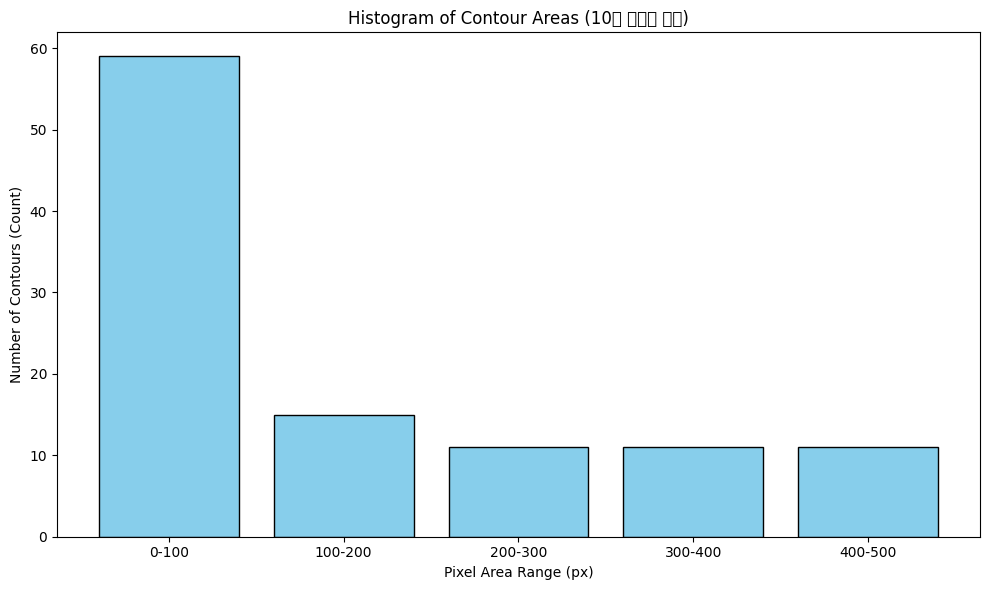


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\1_result'에 저장되었습니다.
10.tif
--- 마스크 분석 결과 ('13_segmentation.png') ---
✅ 전체 Contour 개수: 208 개


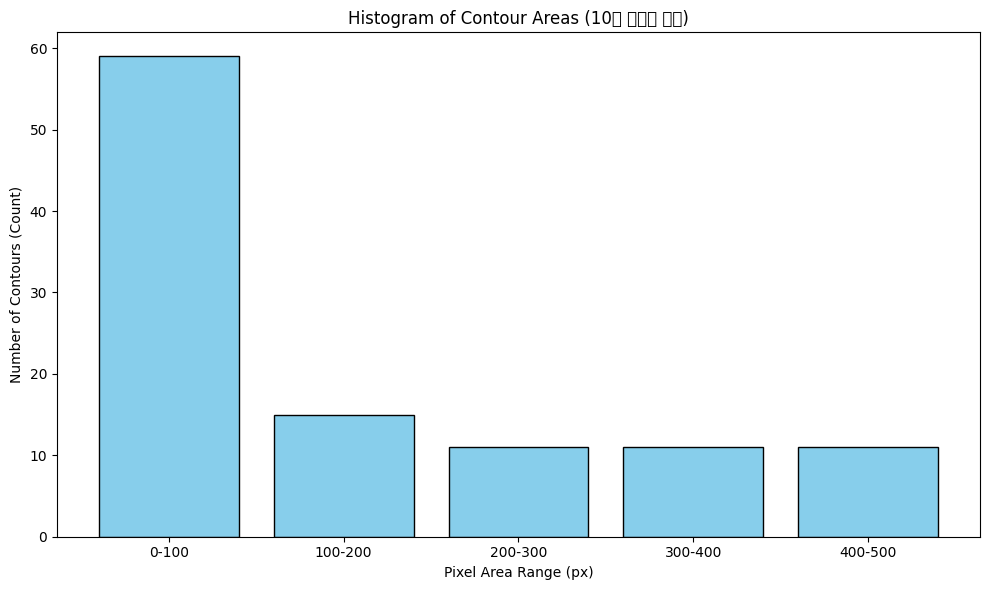


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\10_result'에 저장되었습니다.
11.tif
--- 마스크 분석 결과 ('13_segmentation.png') ---
✅ 전체 Contour 개수: 208 개


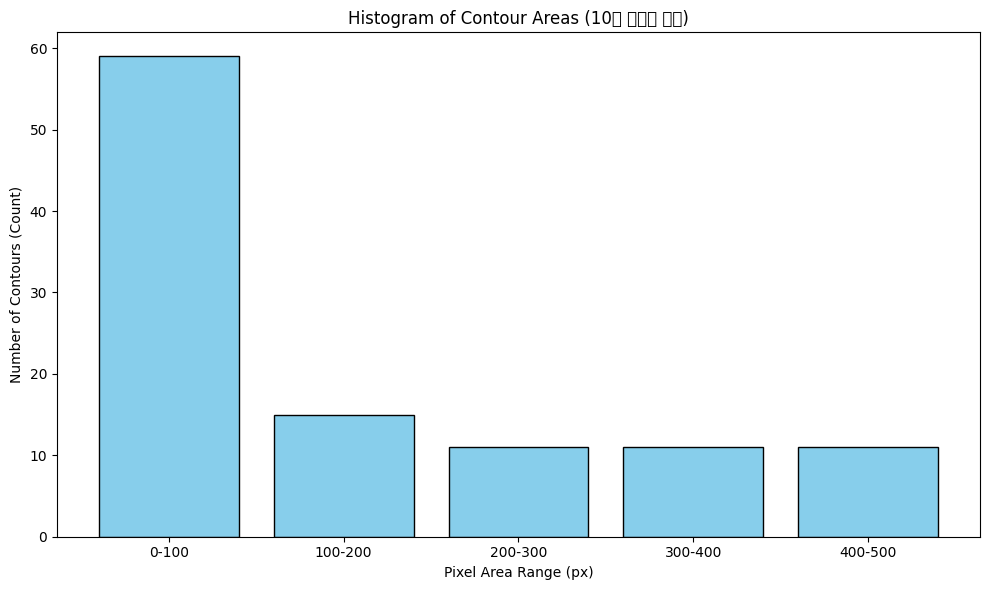


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\11_result'에 저장되었습니다.
12.tif
--- 마스크 분석 결과 ('13_segmentation.png') ---
✅ 전체 Contour 개수: 208 개


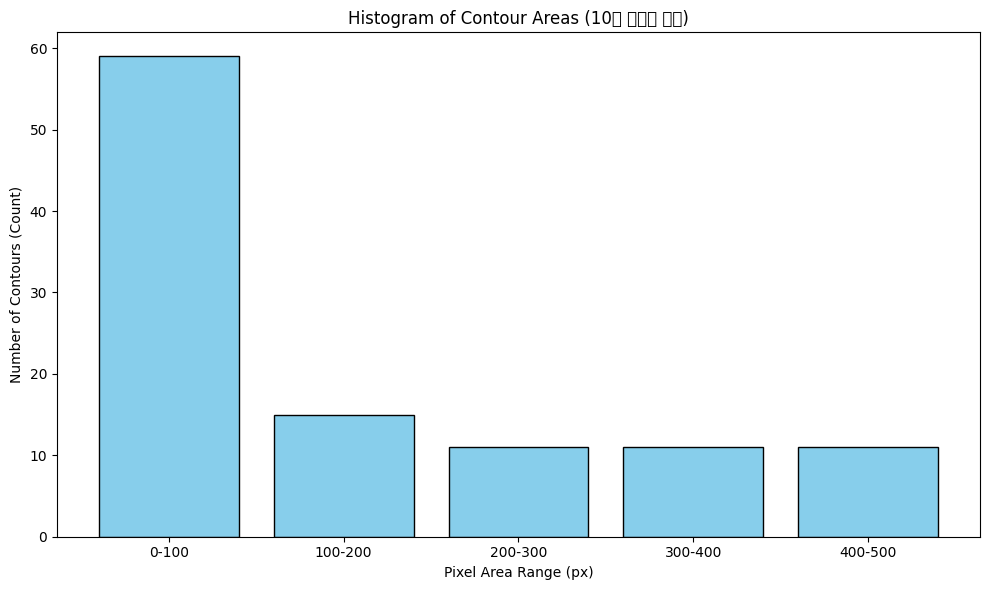


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\12_result'에 저장되었습니다.
13.tif
--- 마스크 분석 결과 ('13_segmentation.png') ---
✅ 전체 Contour 개수: 208 개


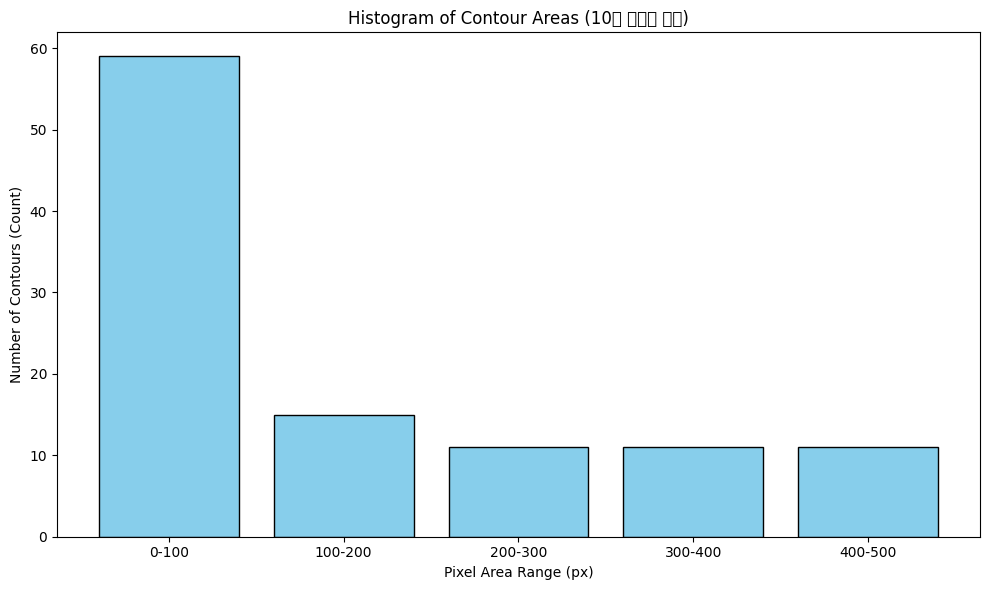


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\Users\yy\Desktop\school\CAPSTONE\submit\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\result2\prediction\13_result'에 저장되었습니다.


In [36]:
for i in df.index:
    print(df.loc[i, "file_name"])

    prediction_path = df.loc[i, "img_dir"]
    name = df.loc[i, 'base_names']
    
    total, hist_count, bin_edge = analyze_segmentation_mask(prediction_file, bin_size=100)
    if os.path.exists(os.path.join(prediction_path, f"{name}_histogram2.png")):    
        os.remove(os.path.join(prediction_path, f"{name}_histogram2.png"))
    plot_histogram_skip_empty(hist_count, bin_edge, prediction_path, name)

### 누끼

1.tif


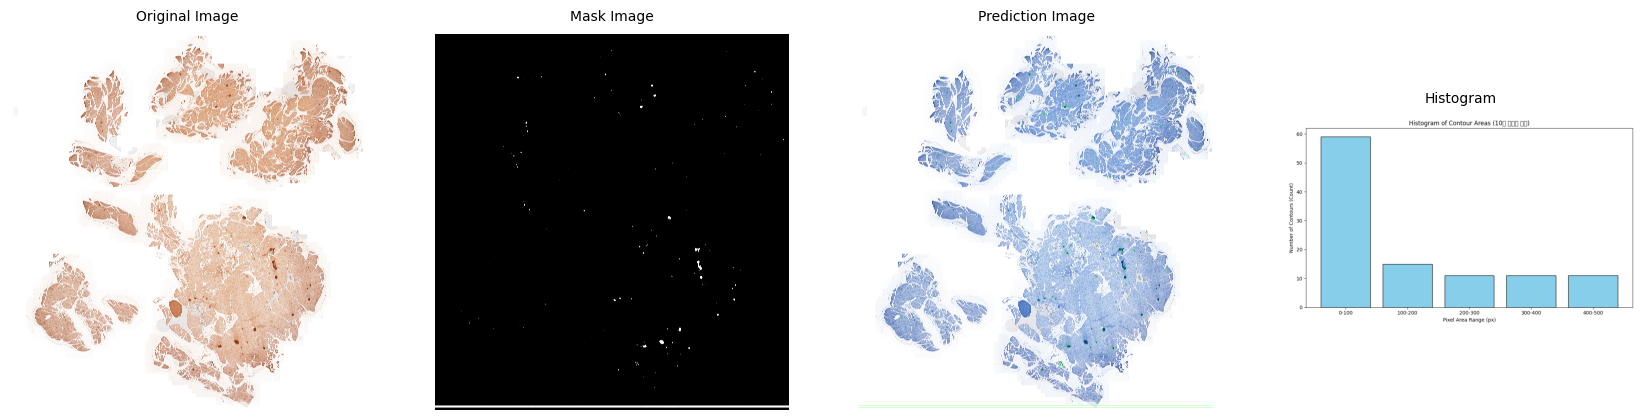

10.tif


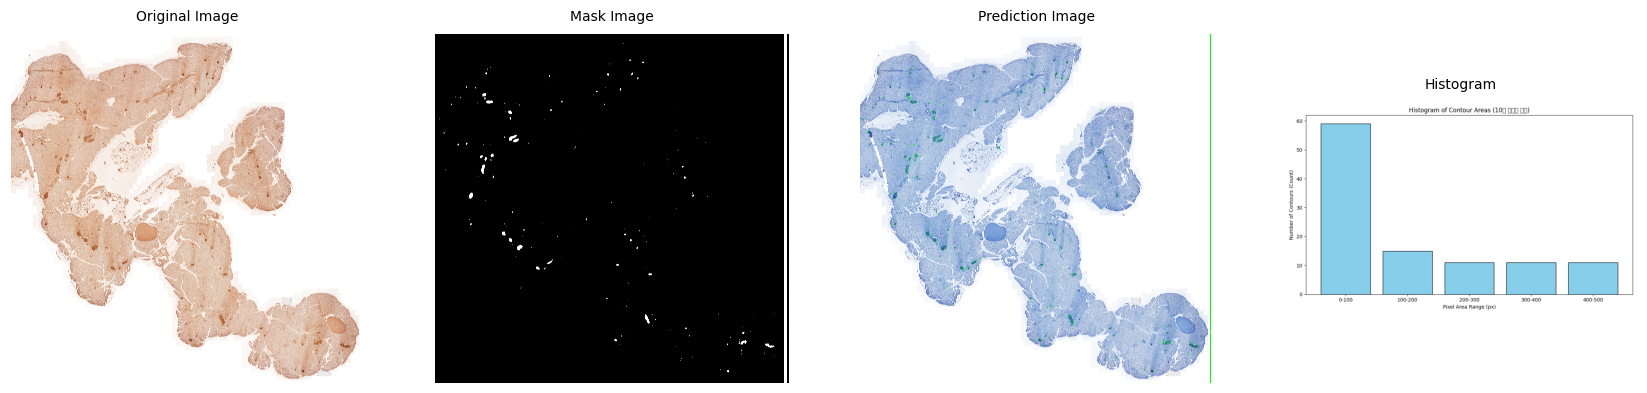

11.tif


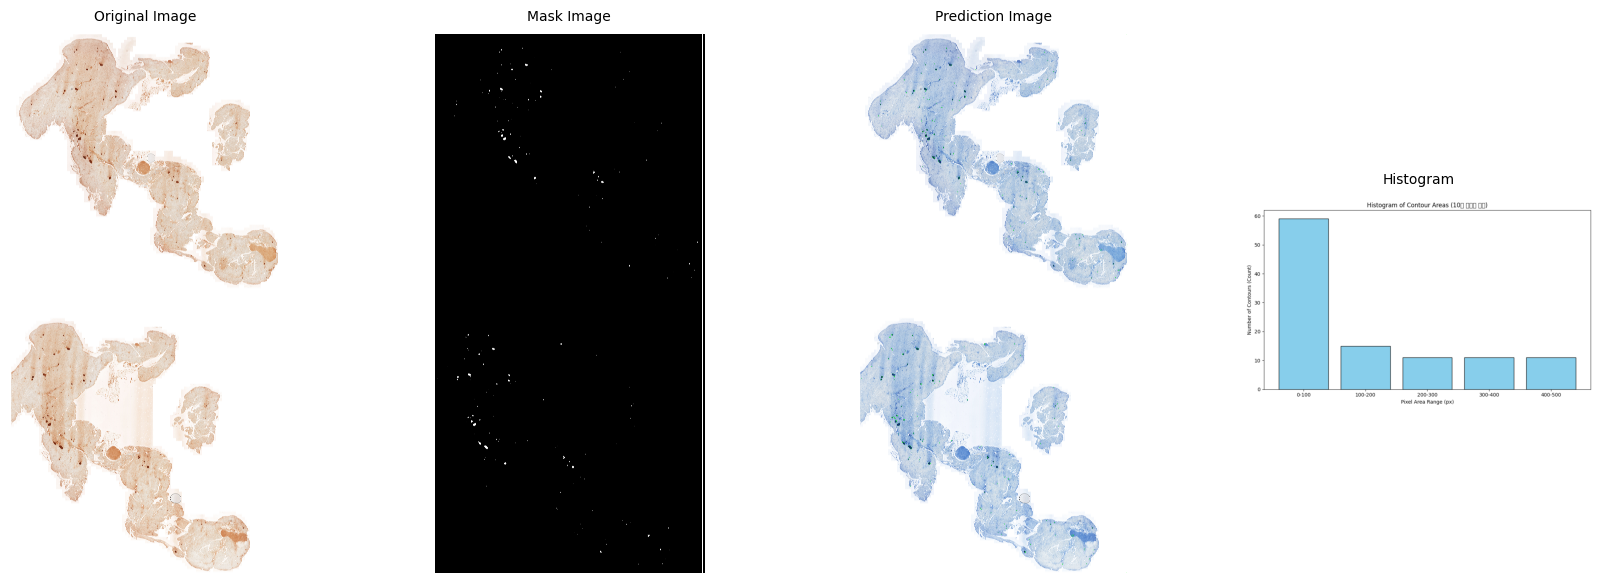

12.tif


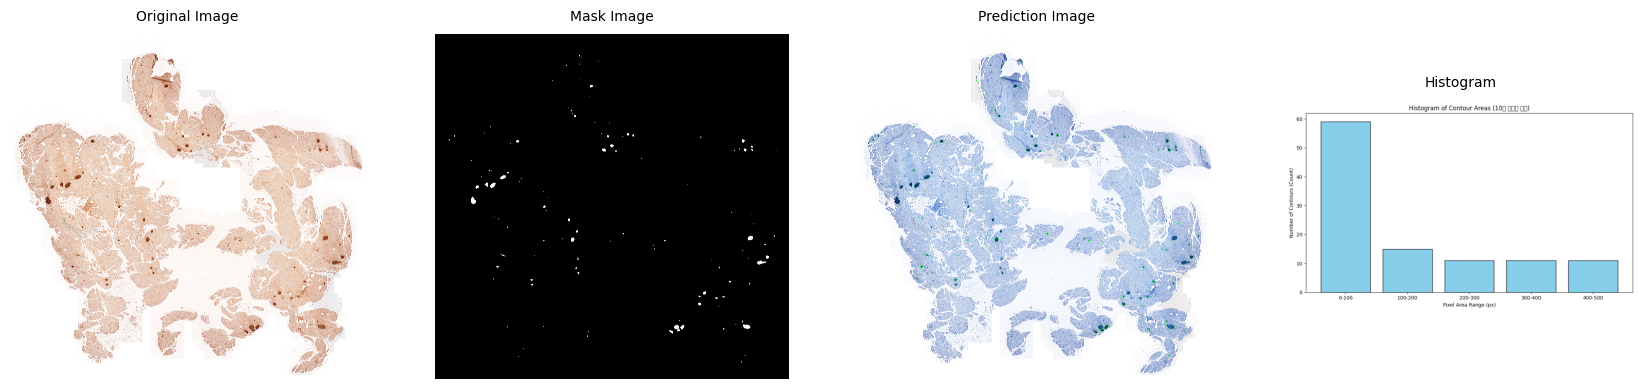

13.tif


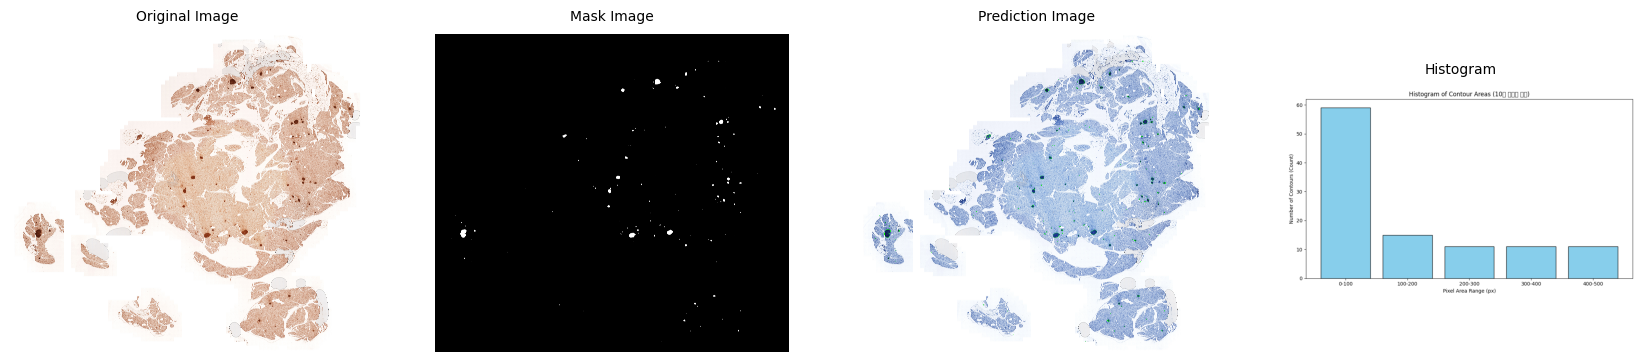

In [42]:
for i in df.index:
    print(df.loc[i, "file_name"])
    image = cv2.imread(df.loc[i,'file_dir'], cv2.IMREAD_COLOR)  # 원본이미지
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 읽으므로 RGB로 변환
    
    prediction_path = df.loc[i, "img_dir"]
    name = df.loc[i, 'base_names']

    prediction_image = cv2.imread(os.path.join(prediction_path, f"{name}_contour.png"), cv2.IMREAD_COLOR)
    prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)

    mask_file = f"{name}_segmentation.png"
    mask_image = cv2.imread(os.path.join(prediction_path, mask_file))[:,:,0]

    tile_dir = os.path.join(prediction_path, f"{name}_original.png")
    cv2.imwrite(tile_dir,image)

    histogram = cv2.imread(os.path.join(prediction_path, f"{name}_histogram.png"), cv2.IMREAD_COLOR)
    histogram = cv2.cvtColor(histogram, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 4, figsize=(21, 7), facecolor='white')
    axes[0].set_title('Original Image', fontsize = 10, pad = 10)
    axes[0].axis('off')
    axes[0].imshow(image)
    axes[1].set_title('Mask Image', fontsize = 10, pad = 10)
    axes[1].axis('off')
    axes[1].imshow(mask_image, cmap='gray')
    axes[2].set_title('Prediction Image', fontsize = 10, pad = 10)
    axes[2].axis('off')
    axes[2].imshow(prediction_image)
    axes[3].set_title('Histogram', fontsize = 10, pad = 10)
    axes[3].axis('off')
    axes[3].imshow(histogram)
    plt.show()
    
